# **Exp4: Design Butterworth filter using Bilinear transformation method.**

**Name: Vrushabh Babasaheb Khatik**

**Roll No: 313072**

**GR No: 22020234**

**Batch: C3**

### Import necessary libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft,rfftfreq
from scipy import signal

### Define variables for value

In [15]:
FS = 8000
Fp,Fs = 800,2400 #pass band frequency=800 & stop band frequency=2400
alpha_p ,alpha_s = 1,20  #Attenuation 1db and 20db

### Convert digital frequncy into angular frequency

In [16]:
wp  = (Fp/FS)*2*np.pi
ws  = (Fs/FS)*2*np.pi
wp,ws

(0.6283185307179586, 1.8849555921538759)

### Convert digital freqency into analog frequency using tan function

In [17]:
omega_p = np.tan(wp/2)
omega_s = np.tan(ws/2)
omega_p, omega_s

(0.3249196962329063, 1.3763819204711734)

### find order of filter and cutoff frequency of analog filter

In [18]:
N,omega_c = signal.buttord(omega_p,omega_s,alpha_p,alpha_s,analog= True)
print(f"Order of filter {N}")
print(f"Cutoff frequency {omega_c}")

Order of filter 3
Cutoff frequency 0.40698673955629


### Design analog filter

Text(0.5, 1.0, 'frequency responce')

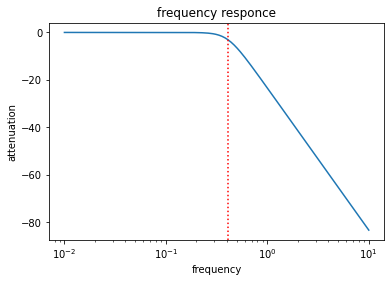

In [19]:
num,den = signal.butter(N,omega_c,"low",True) # find coeff off numarator and denoinator
ws, hs = signal.freqs(num,den)                # find gain for corresonding freq
z,p = signal.bilinear(num,den)                # use bilinear transformation get zeros and poles
plt.semilogx(ws,20*np.log10(np.abs(hs)))      # plot freq responce
plt.axvline(omega_c,color="red",linestyle = "dotted")
plt.xlabel("frequency")
plt.ylabel("attenuation")
plt.title("frequency responce")

### Convert analog filter into digital filter

zeros[0.00562434 0.01687302 0.01687302 0.00562434]
poles[ 1.         -2.20185327  1.69231011 -0.44546213]


Text(0.5, 1.0, 'frequency responce')

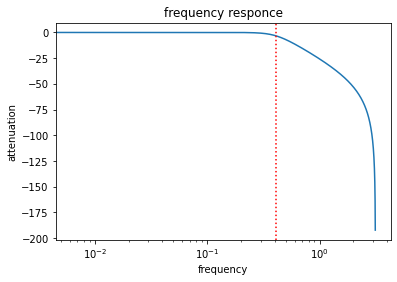

In [20]:
z,p = signal.bilinear(num,den,1) # find zeors and poles using bilinear tranfromation of normalizer filter 
print(f"zeros{z}\npoles{p}")    
wz,hz =signal.freqz(z,p)        # convert into z domain
plt.semilogx(wz,20*np.log10(np.abs(hz)))    # plot responce
plt.axvline(omega_c,color="red",linestyle = "dotted")
plt.xlabel("frequency")
plt.ylabel("attenuation")
plt.title("frequency responce")

### Build Test Signal

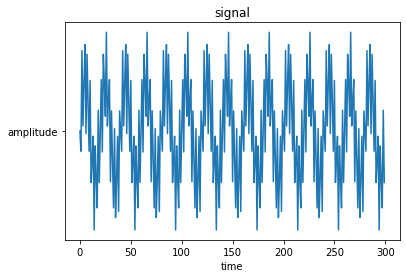

In [21]:
n = 300
t = np.arange(0,n)
f0,f1 = 400, 5000

ip_signal = np.sin(2*np.pi*t*f0/FS) + np.sin(2*np.pi*t*f1/FS) # combine to singal of diff freq

plt.plot(t,ip_signal)       # plote singnal
plt.title("signal")
plt.xlabel("time")
plt.plot("amplitude") 

### FFT of test signal

Text(0.5, 1.0, 'fft')

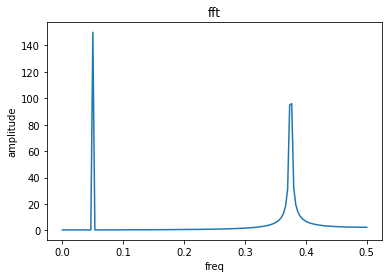

In [22]:
yf = rfft(ip_signal)
xf = rfftfreq(n) 
plt.plot(xf,np.abs(yf))
plt.xlabel("freq")
plt.ylabel("amplitude")
plt.title("fft")

### FFT of filterd test singal

Text(0.5, 1.0, 'fft')

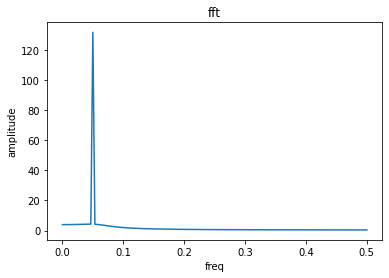

In [23]:
filterd_signal = signal.lfilter(z,p,ip_signal) # filter the signal by contructing  and passing  through iir filter 
yf = rfft(filterd_signal)
xf = rfftfreq(n) 
plt.plot(xf,np.abs(yf))
plt.xlabel("freq")
plt.ylabel("amplitude")
plt.title("fft")

### Plot filtered Singal

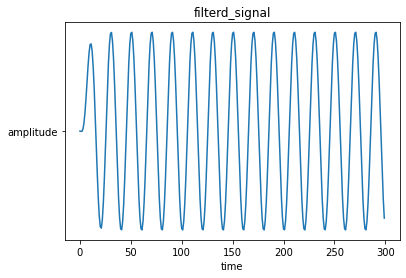

In [24]:
plt.plot(t,filterd_signal)
plt.title("filterd_signal")
plt.xlabel("time")
plt.plot("amplitude") 